In [28]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)
pylab.rcParams['axes.grid'] = False
pylab.rcParams['axes.facecolor'] = 'white'
pylab.rcParams['axes.edgecolor'] = 'white'

Populating the interactive namespace from numpy and matplotlib


In [26]:
[param for param in pylab.rcParams if 'axes' in param]

['axes.autolimit_mode',
 'axes.axisbelow',
 'axes.edgecolor',
 'axes.facecolor',
 'axes.formatter.limits',
 'axes.formatter.min_exponent',
 'axes.formatter.offset_threshold',
 'axes.formatter.use_locale',
 'axes.formatter.use_mathtext',
 'axes.formatter.useoffset',
 'axes.grid',
 'axes.grid.axis',
 'axes.grid.which',
 'axes.hold',
 'axes.labelcolor',
 'axes.labelpad',
 'axes.labelsize',
 'axes.labelweight',
 'axes.linewidth',
 'axes.prop_cycle',
 'axes.spines.bottom',
 'axes.spines.left',
 'axes.spines.right',
 'axes.spines.top',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.unicode_minus',
 'axes.xmargin',
 'axes.ymargin',
 'axes3d.grid',
 'keymap.all_axes',
 'legend.borderaxespad',
 'polaraxes.grid']

In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/tinder_pics_dislikes_faces_firsts_deduped_encodings.pickle')
paths, encodings, arrays_rescaled, X = append_new_dataset(paths, encodings, arrays_rescaled, X,'../data/tinder_pics_likes_faces_deduped_firsts_encodings.pickle')
num_of_likes = len(paths) - len(data)


743 743 743 743


In [30]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":50,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}



umap_embeddings = UMAP(**params).fit_transform(encodings)

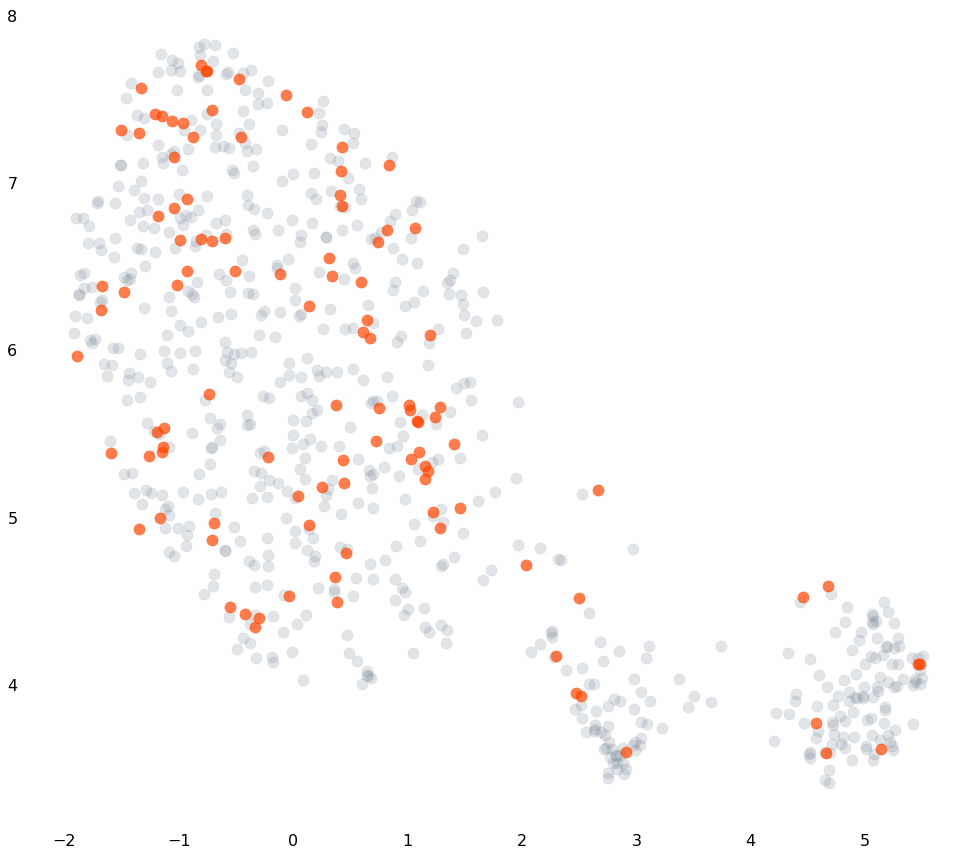

In [31]:


x = umap_embeddings[:, 0]
y = umap_embeddings[:, 1]

#dislikes
plt.scatter(x[:-num_of_likes], y[:-num_of_likes], color='slategray', alpha=0.2)

#likes
plt.scatter(x[-num_of_likes:], y[-num_of_likes:], color='orangered', alpha=0.7)
plt.show()
